

# Project: Investigate Popularity Effect 
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The TMDB movies dataset has so much information about the movies but I really want to investigate the effects of the popularity (which is clearly a result to marketing) on the revenues,budget,rating,runtime,number of votes and the average rating of the film.
1) Checking whether the popularity is increasing over the years or not which will show whether companies are paying more attention to marketing or not, through a bar plot showing the increase of number of movies released through the years and then comparing the popularity for those years.

2) Checking if the budget of the movie affects its popularity or not, and if the popularity affects the revenue of the film or not. through a scatter plot i can find the correlation if it's there and see the effects. 

3) Seeing the relationship between the popularity and the reviewing of the film, through seeing the number of the voters for the film if it's related to the popularity or not, and if so, if the popularity increases the number of voters, will it affect the score of the film if more people vote for it? does the number of voters affect the score of the film?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
df.duplicated().sum()

1


### Data Cleaning 

dropping the unused columns from the dataframe, deleting the duplicates, had no na values so no need to remove or fill it.

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.drop(['imdb_id','cast','homepage','director','tagline','runtime','keywords','overview','production_companies','release_date','genres','budget_adj','revenue_adj'],axis=1,inplace=True)

In [10]:
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [11]:
df.head()

,id,popularity,budget,revenue,original_title,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,2947,7.3,2015


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 8 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 763.9+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f741d8820b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f741d651898>]], dtype=object)

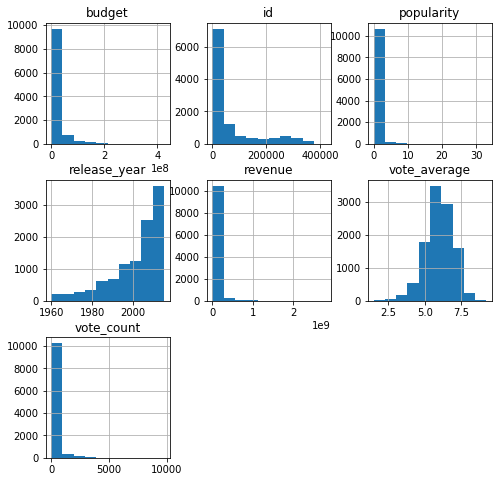

In [13]:
df.hist(figsize=(8,8))

<a id='eda'></a>
## Exploratory Data Analysis

### Does popularity increase with time?

Checking the sum of popularity of the films released in the year shows that popularity increases with time.

Text(0.5,1,'Cumulative Popularity over the years')

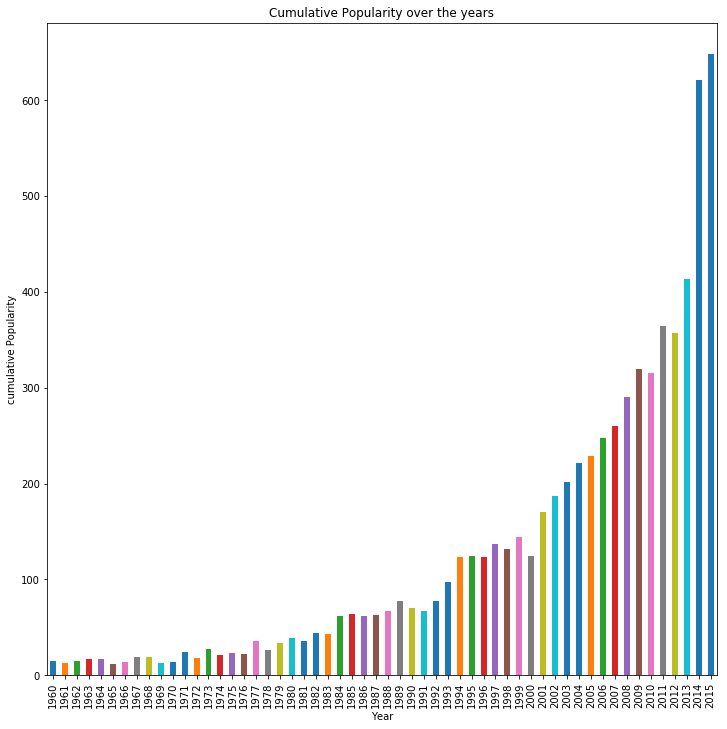

In [43]:
sub_df=df.groupby('release_year')['popularity'].sum()
ax= sub_df.plot(x='release_year',y='popularity',kind='bar',figsize=(12,12))
ax.set_xlabel('Year')
ax.set_ylabel('cumulative Popularity')
ax.set_title('Cumulative Popularity over the years')

But what if more movies are being released each year? that would mean the cumulative popularity isn't the best indication

In [44]:
year_num_releases=df.groupby('release_year')['id'].count()

Text(0.5,1,'Number of movies over the years')

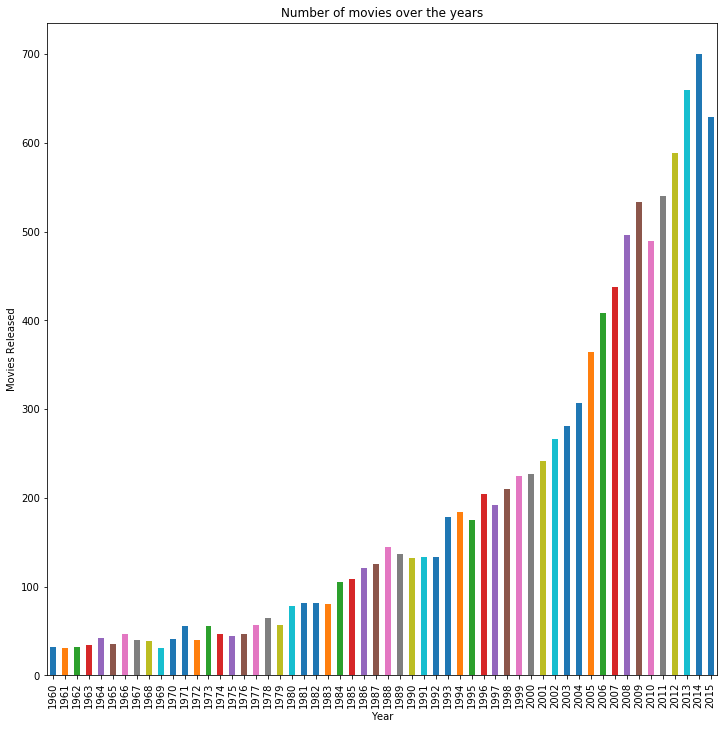

In [45]:
ax = year_num_releases.plot(x='release_year',y=df.id.count(),kind='bar',figsize=(12,12))
ax.set_xlabel('Year')
ax.set_ylabel('Movies Released')
ax.set_title('Number of movies over the years')

As expected, more movies are being released, so the cumulative popularity isn't the best indication so let's take the mean popularity to get over the number issue

In [46]:
year_avg_pop=df.groupby('release_year')['popularity'].mean()

Text(0.5,1,'Popularity over the years')

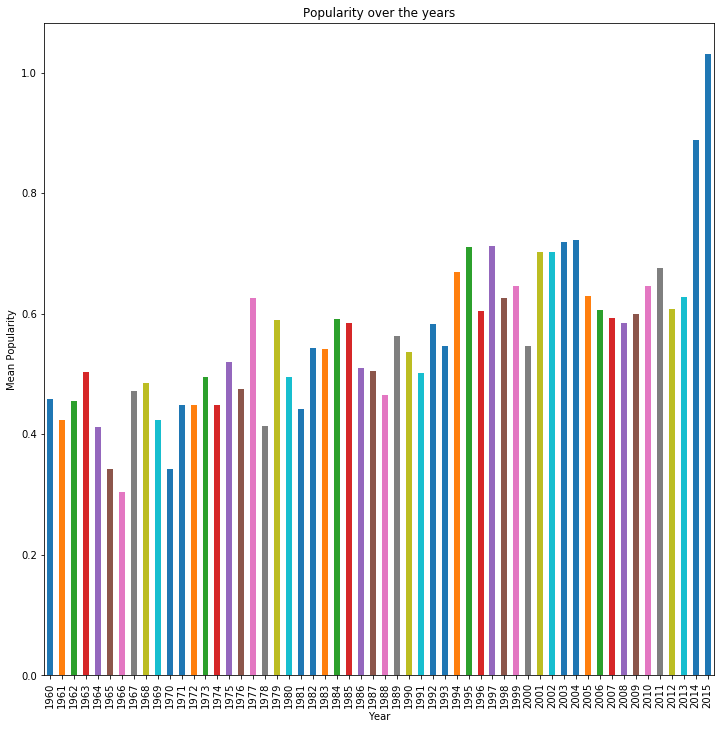

In [47]:
ax = year_avg_pop.plot(x='release_year',y=df.popularity.mean,kind='bar',figsize=(12,12))
ax.set_xlabel('Year')
ax.set_ylabel('Mean Popularity')
ax.set_title('Popularity over the years')

Well the mean popularity shows some different results here, the popularity was changing over the year with no real pattern except for really recent years they're increasing remarkably.

In [48]:
df['popularity'].corr(df['release_year'])

0.089805550839179821

The correlation is very low which shows that there's no direct relation between years and popularity.

### Popularity relationship with budget and revenue

through a scatter plot, we can see the relationship between the popularity and the revenue.

Text(0.5,1,'Popularity and revenue')

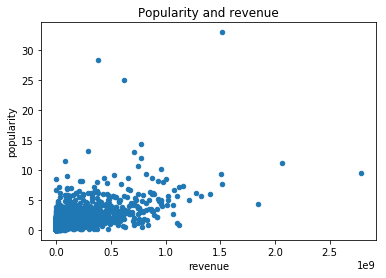

In [50]:
ax =df.plot(x='revenue',y='popularity',kind='scatter')
ax.set_title('Popularity and revenue')

From the scatter plot we can see the positive correlation between the revenue and the popularity which indicates that the more popular the film the more revenue it gets

In [57]:
print(f"The correlation is: { df['revenue'].corr(df['popularity'])} as expected it is positive and shows the relationship between the revenue and the popularity")

The correlation is: 0.6633602814125906 as expected it is positive and shows the relationship between the revenue and the popularity


Now let's look at the popularity and the budget:

Text(0.5,1,'budget and popularity')

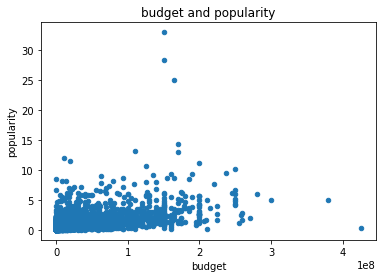

In [58]:
ax = df.plot(x='budget',y='popularity',kind='scatter')
ax.set_title('budget and popularity')

we can see that there's a positive correlation between the budget and the popularity despite having some exceptions, it's still not as strong as the correlation between the popularity and revenue

In [59]:
print(f" correlation between budget and popularity is: {df['budget'].corr(df['popularity'])}, which is as we saw from the plot is lower than the one between revenue and popularity")

 correlation between budget and popularity is: 0.5454807929309623, which is as we saw from the plot is lower than the one between revenue and popularity


### Popularity and Reviews

Text(0.5,1,'popularity and vote count')

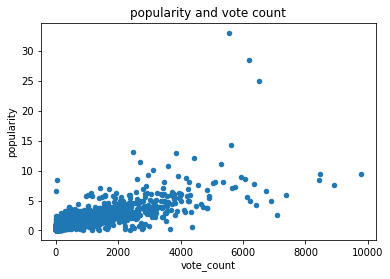

In [60]:
ax = df.plot(x='vote_count',y='popularity',kind='scatter')
ax.set_title('popularity and vote count')

We can see here the positive correlation between popularity and the number of votes which shows the importance of popularity to increase the audience of the film.

In [61]:
df['vote_count'].corr(df['popularity'])

0.80082849326730388

Text(0.5,1,'number of votes and average score')

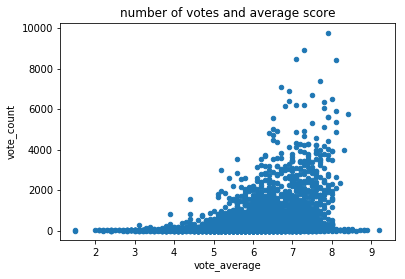

In [64]:
ax=df.plot(x='vote_average',y='vote_count',kind='scatter')
ax.set_title('number of votes and average score')

we can see that the number of votes isn't the main factor in determining the score as the highest scores didn't come from the most votes as well as having many high number of vites where the score wasn't the highest. 

Text(0.5,1,'popularity and average score')

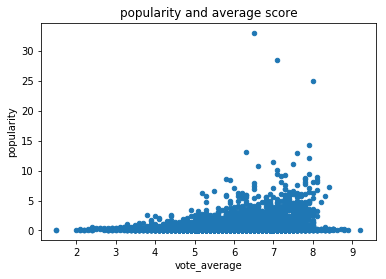

In [65]:
ax=df.plot(x='vote_average',y='popularity',kind='scatter')
ax.set_title('popularity and average score')

In [66]:
df['popularity'].corr(df['vote_average'])

0.20951701409661441

<a id='conclusions'></a>
## Conclusions

> 1) Popularity and release year: 

The popularity wasn't steadily increasing over the years until the last two years in the dataset which is the first problem with the dataset and that it stops at 2016, 5 years from now and that's a bit too much especially that the pattern was still going to be explicit. 
The other problem with the dataset and the year of release is that few data were available in earlier years, so it's not clear whether the low number of films released earlier is due to lack of data or if it's really low number of films were being released.
so assuming the data is correct, showing that released movies in recent years are more than of earlier years helped me realize the importance of comparing the years based on the mean popularity not the cumulative popularity.
as despite having 10865 movies most of them are more recent. 

> 2) Popularity, Budget and Revenues:

We saw that the budget increases the popularity of the film (surely since there's more funds for marketing) and that the revenue increases with popularity but actually the correlation between the popularity and the revenue is higher than the correlation between popularity and budget which shows the cruical part of popularity for the financial aspects of the industry and the probabilities by which we can invest more in films to increase popularity so we can increase the revenue more and more!
more specific computations would've been better to calculate the ratio between the increase in budget and increase in popularity hence we can calculate the increase in revenue. 

> 3) Popularity and Ratings:

As we saw popularity increases the audience of the film so it increases the number of votes, but we also saw that the effect is limited regarding the score itself as it only had 0.2 correlation with the popularity.

there was no data limitations that faced me in the analysis as there were no key values that i used were missing. but surely more data would've given me more insight and allowed more computations to get more relationships between popularity and other aspects.


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [67]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0